<a href="https://colab.research.google.com/github/Stig9000/first-projects/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans


from getpass import getpass
import sys
from sqlalchemy import create_engine
import string
import sqlalchemy
import pickle


import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
cc=pd.read_csv("/content/CC GENERAL.csv")

cc.to_pickle('credit_file.pkl')

credit = pd.read_pickle('credit_file.pkl')


In [ ]:
credit

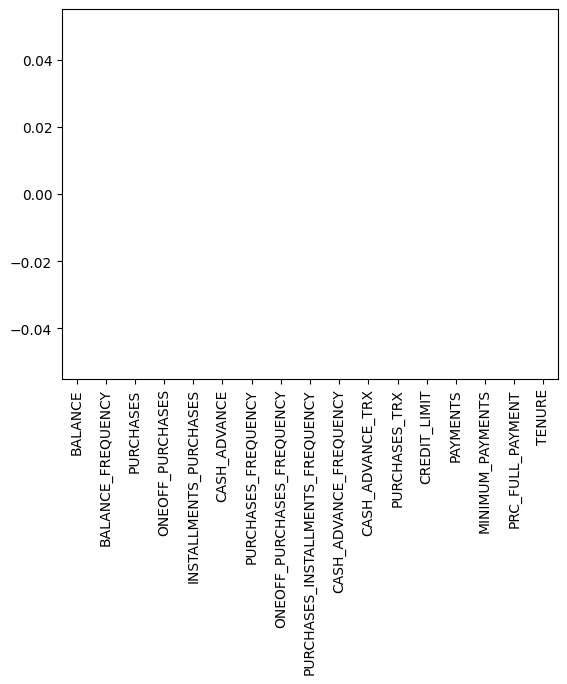

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
credit.drop(['CUST_ID'], axis = 1, inplace = True)

credit['MINIMUM_PAYMENTS']=credit['MINIMUM_PAYMENTS'].fillna(0)

credit['CREDIT_LIMIT'].fillna(0, inplace = True)

credit.isna().sum().plot(kind='bar')
plt.show()

credit



In [ ]:

"""
for a in credit.columns:
    for b in credit.columns:
        if a != b:
            correlation = credit[a].corr(credit[b])
            print(f'The correlation between {a} and {b} is : {correlation}')
 """



combos = set()
correlations_2 = []
for a in credit.columns:
    for b in credit.columns:
        pair, pair_reversed = (a,b), (b,a)
        if a != b and pair not in combos and pair_reversed not in combos:
            correlation = credit[a].corr(credit[b])
            correlations_2.append((f'{a} - {b}', correlation))
            combos.add((a,b))


"""
sns.scatterplot(x ='PURCHASES', y= 'PURCHASES_TRX', data = credit)
plt.show()

sns.lmplot(x ='CASH_ADVANCE', y= 'BALANCE', data = credit)
plt.show()
"""
'''This sorts the list of correlations by their absolute values regardless whether
the coefficient is negative or positive'''

#correlations.sort(key = lambda x: abs(x[1]), reverse = True)


correlations_2.sort(key = lambda x: abs(x[1]), reverse = True)

'''Prints out the list in a neat easily readable manner'''

#Elbow method
"""
for pair, correlation in correlation:
    print(f'Correlation between {pair}: {correlation}')
"""
for pair, correlation in correlations_2:
    print(f'Correlation between {pair}: {correlation}')


Correlation between PURCHASES - ONEOFF_PURCHASES: 0.9168445587151443
Correlation between PURCHASES_FREQUENCY - PURCHASES_INSTALLMENTS_FREQUENCY: 0.8629336372699647
Correlation between CASH_ADVANCE_FREQUENCY - CASH_ADVANCE_TRX: 0.799560757399387
Correlation between PURCHASES - PURCHASES_TRX: 0.6895608345245262
Correlation between PURCHASES - INSTALLMENTS_PURCHASES: 0.6798962203562015
Correlation between CASH_ADVANCE - CASH_ADVANCE_TRX: 0.6564975416806123
Correlation between CASH_ADVANCE - CASH_ADVANCE_FREQUENCY: 0.6285220743115787
Correlation between INSTALLMENTS_PURCHASES - PURCHASES_TRX: 0.6281075383558657
Correlation between PURCHASES - PAYMENTS: 0.6032638314010624
Correlation between PURCHASES_FREQUENCY - PURCHASES_TRX: 0.5684298289963322
Correlation between ONEOFF_PURCHASES - PAYMENTS: 0.5672916182382328
Correlation between ONEOFF_PURCHASES - PURCHASES_TRX: 0.5455232847565036
Correlation between ONEOFF_PURCHASES_FREQUENCY - PURCHASES_TRX: 0.5448693039715313
Correlation between BALA

In [ ]:


##new_cc = credit.loc[:,('PURCHASES','PURCHASES_TRX')]

p_cc = credit.loc[:,('PURCHASES', 'MINIMUM_PAYMENTS')]

In [ ]:
p_cc

,PURCHASES_FREQUENCY,MINIMUM_PAYMENTS
0,0.166667,139.509787
1,0.000000,1072.340217
2,1.000000,627.284787
3,0.083333,0.000000
4,0.083333,244.791237
...,...,...
8945,1.000000,48.886365
8946,1.000000,0.000000
8947,0.833333,82.418369
8948,0.000000,55.755628


1
Initialization complete
Iteration 0, inertia 99408069887.30504.
Iteration 1, inertia 89687388884.41823.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 134594812099.13054.
Iteration 1, inertia 89687388884.41823.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 96350616181.35956.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 1, inertia 89687388884.41823.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 97540397037.96588.
Iteration 1, inertia 89687388884.41823.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 120648435143.93585.
Iteration 1, inertia 89687388884.41823.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 102595746325.17258.
Iteration 1, inertia 89687388884.41823.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 90044852906.2131.
Iteration 1, inertia 89687388884.41823.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 98373489802.14893.
Iteration 1, inertia 89687388884.41823.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 97327776377.22311.
Iteration 1, inertia 89687388884.41823.
Converged at iteration 1: strict convergence.
Initializatio

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 1, inertia 61944440579.47916.
Iteration 2, inertia 61598698944.11128.
Iteration 3, inertia 61465308770.10092.
Iteration 4, inertia 61456629314.36093.
Iteration 5, inertia 61452049173.434845.
Initialization complete
Iteration 0, inertia 66240531747.558716.
Iteration 1, inertia 64081195101.22864.
Iteration 2, inertia 62620618862.86157.
Iteration 3, inertia 61978751590.111404.
Iteration 4, inertia 61943409791.98271.
Iteration 5, inertia 61874233195.76578.
Initialization complete
Iteration 0, inertia 73356041858.84816.
Iteration 1, inertia 64602600199.626595.
Iteration 2, inertia 64046413185.678734.
Iteration 3, inertia 63672510979.34544.
Iteration 4, inertia 63460457175.076035.
Iteration 5, inertia 63361771118.944565.
Initialization complete
Iteration 0, inertia 81738542600.04549.
Iteration 1, inertia 72151507844.83194.
Iteration 2, inertia 71376181920.87395.
Iteration 3, inertia 71096721783.94214.
Iteration 4, inertia 69923582958.09462.
Iteration 5, inertia 67147769711.55495.
I

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 2, inertia 43500611645.90479.
Iteration 3, inertia 42241962751.73662.
Iteration 4, inertia 41808091987.892525.
Iteration 5, inertia 41752338245.63286.
Initialization complete
Iteration 0, inertia 50106559806.97759.
Iteration 1, inertia 43238306938.71522.
Iteration 2, inertia 42136810226.5542.
Iteration 3, inertia 41715524490.88043.
Iteration 4, inertia 41637770829.29591.
Iteration 5, inertia 41600944271.81028.
Initialization complete
Iteration 0, inertia 54391800075.92001.
Iteration 1, inertia 45718757996.27602.
Iteration 2, inertia 43234598500.64986.
Iteration 3, inertia 42149970216.983826.
Iteration 4, inertia 41727204890.38818.
Iteration 5, inertia 41645427859.83211.
Initialization complete
Iteration 0, inertia 50128817360.824326.
Iteration 1, inertia 44676638066.85693.
Iteration 2, inertia 43583585012.83462.
Iteration 3, inertia 42906308853.80862.
Iteration 4, inertia 42413970057.259415.
Iteration 5, inertia 42028121548.032616.
Initialization complete
Iteration 0, inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 3, inertia 33147015856.004913.
Iteration 4, inertia 33135404533.13117.
Iteration 5, inertia 33113691872.630863.
Initialization complete
Iteration 0, inertia 39675617316.15643.
Iteration 1, inertia 31802443358.241116.
Iteration 2, inertia 30856203678.06234.
Iteration 3, inertia 30730840653.74878.
Iteration 4, inertia 30695979184.61806.
Iteration 5, inertia 30677303478.533424.
Initialization complete
Iteration 0, inertia 48044486222.79404.
Iteration 1, inertia 36532447389.85017.
Iteration 2, inertia 33265579230.93953.
Iteration 3, inertia 31790784285.61501.
Iteration 4, inertia 31116951100.214336.
Iteration 5, inertia 30938946715.520897.
Initialization complete
Iteration 0, inertia 36356520671.240875.
Iteration 1, inertia 34567671850.53123.
Iteration 2, inertia 33874371045.944294.
Iteration 3, inertia 33534880660.33918.
Iteration 4, inertia 33408310084.61431.
Iteration 5, inertia 33339552602.83814.
5
Initialization complete
Iteration 0, inertia 30999279228.670357.
Iteration 1, 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 26962819815.40326.
Iteration 1, inertia 22512781780.298958.
Iteration 2, inertia 22463882183.93759.
Iteration 3, inertia 22462025711.65583.
Iteration 4, inertia 22460469083.540108.
Converged at iteration 4: center shift 382.0405519497707 within tolerance 501.04686527606924.
Initialization complete
Iteration 0, inertia 32681701690.132336.
Iteration 1, inertia 25222152073.155422.
Iteration 2, inertia 23472002278.466087.
Iteration 3, inertia 22926265583.929974.
Iteration 4, inertia 22697695386.851696.
Iteration 5, inertia 22586780056.926544.
Initialization complete
Iteration 0, inertia 27356779019.067482.
Iteration 1, inertia 23204705397.446827.
Iteration 2, inertia 22905507397.79793.
Iteration 3, inertia 22759238394.625996.
Iteration 4, inertia 22630004618.95535.
Iteration 5, inertia 22580663806.49044.
Initialization complete
Iteration 0, inertia 33741661935.567993.
Iteration 1, inertia 27940884674.137276.
Iteration 2, inertia 26718922888.029438.
Iteration 3, inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 29728619759.10254.
Iteration 1, inertia 24834356283.204426.
Iteration 2, inertia 23553853836.566833.
Iteration 3, inertia 22758351624.918633.
Iteration 4, inertia 22040288748.378822.
Iteration 5, inertia 20979955453.135387.
Initialization complete
Iteration 0, inertia 26443273544.52878.
Iteration 1, inertia 22657147909.303875.
Iteration 2, inertia 21488504610.11685.
Iteration 3, inertia 20703379470.712605.
Iteration 4, inertia 19832252188.58583.
Iteration 5, inertia 19160810719.844566.
Initialization complete
Iteration 0, inertia 24630677920.722237.
Iteration 1, inertia 20140699463.597412.
Iteration 2, inertia 19828362633.91879.
Iteration 3, inertia 19687997488.1839.
Iteration 4, inertia 19493188798.655125.
Iteration 5, inertia 19273626925.460445.
Initialization complete
Iteration 0, inertia 27730759679.423447.
Iteration 1, inertia 22455318972.059193.
Iteration 2, inertia 20099441288.163906.
Iteration 3, inertia 18927472804.320827.
Iteration 4, inertia 18487864365.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 1, inertia 15705422402.512531.
Iteration 2, inertia 14566066556.062336.
Iteration 3, inertia 14187214812.569233.
Iteration 4, inertia 14106288397.091583.
Iteration 5, inertia 14084167972.131876.
Initialization complete
Iteration 0, inertia 20758939971.04633.
Iteration 1, inertia 15710568765.030127.
Iteration 2, inertia 15212646320.700169.
Iteration 3, inertia 15069142357.039852.
Iteration 4, inertia 15016108910.957142.
Iteration 5, inertia 14989327698.803894.
Initialization complete
Iteration 0, inertia 22518017843.832233.
Iteration 1, inertia 17488592385.403084.
Iteration 2, inertia 15793197203.240234.
Iteration 3, inertia 14775485621.990242.
Iteration 4, inertia 14363744718.651535.
Iteration 5, inertia 14205899548.35622.
Initialization complete
Iteration 0, inertia 19677851395.91841.
Iteration 1, inertia 17493646716.86669.
Iteration 2, inertia 17110336103.729118.
Iteration 3, inertia 16890939508.242031.
Iteration 4, inertia 16566649651.73304.
Iteration 5, inertia 1622396955

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 4, inertia 12586545254.33781.
Iteration 5, inertia 12549864640.541428.
Initialization complete
Iteration 0, inertia 15496734582.842962.
Iteration 1, inertia 13031166316.999973.
Iteration 2, inertia 12729396147.783276.
Iteration 3, inertia 12662520602.540945.
Iteration 4, inertia 12615027165.994062.
Iteration 5, inertia 12568196248.465313.
Initialization complete
Iteration 0, inertia 13894055866.492619.
Iteration 1, inertia 12248985255.707556.
Iteration 2, inertia 12072742686.805244.
Iteration 3, inertia 12012916505.39967.
Iteration 4, inertia 11980630985.381706.
Iteration 5, inertia 11958089055.021954.
Initialization complete
Iteration 0, inertia 15644200621.624477.
Iteration 1, inertia 13056715941.700329.
Iteration 2, inertia 12555862678.146446.
Iteration 3, inertia 12495945800.45832.
Iteration 4, inertia 12462464567.409332.
Iteration 5, inertia 12440225156.663147.
Initialization complete
Iteration 0, inertia 14596427903.010998.
Iteration 1, inertia 12438460443.300964.
Itera

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 1, inertia 11495683813.653807.
Iteration 2, inertia 10440321768.02133.
Iteration 3, inertia 10174079655.133533.
Iteration 4, inertia 10097368216.842113.
Iteration 5, inertia 10084103359.685825.
Initialization complete
Iteration 0, inertia 15003476995.924894.
Iteration 1, inertia 11670604095.041687.
Iteration 2, inertia 10768475438.311134.
Iteration 3, inertia 10356333753.643438.
Iteration 4, inertia 10177430155.54871.
Iteration 5, inertia 10107881389.57996.
Initialization complete
Iteration 0, inertia 14827591885.1829.
Iteration 1, inertia 11755114292.108501.
Iteration 2, inertia 11036713251.278717.
Iteration 3, inertia 10764879104.498852.
Iteration 4, inertia 10663147476.587852.
Iteration 5, inertia 10636146125.453194.
Initialization complete
Iteration 0, inertia 16081499783.358845.
Iteration 1, inertia 11617711930.24707.
Iteration 2, inertia 11116222486.925468.
Iteration 3, inertia 10947930672.46482.
Iteration 4, inertia 10841067202.770323.
Iteration 5, inertia 10781675477.

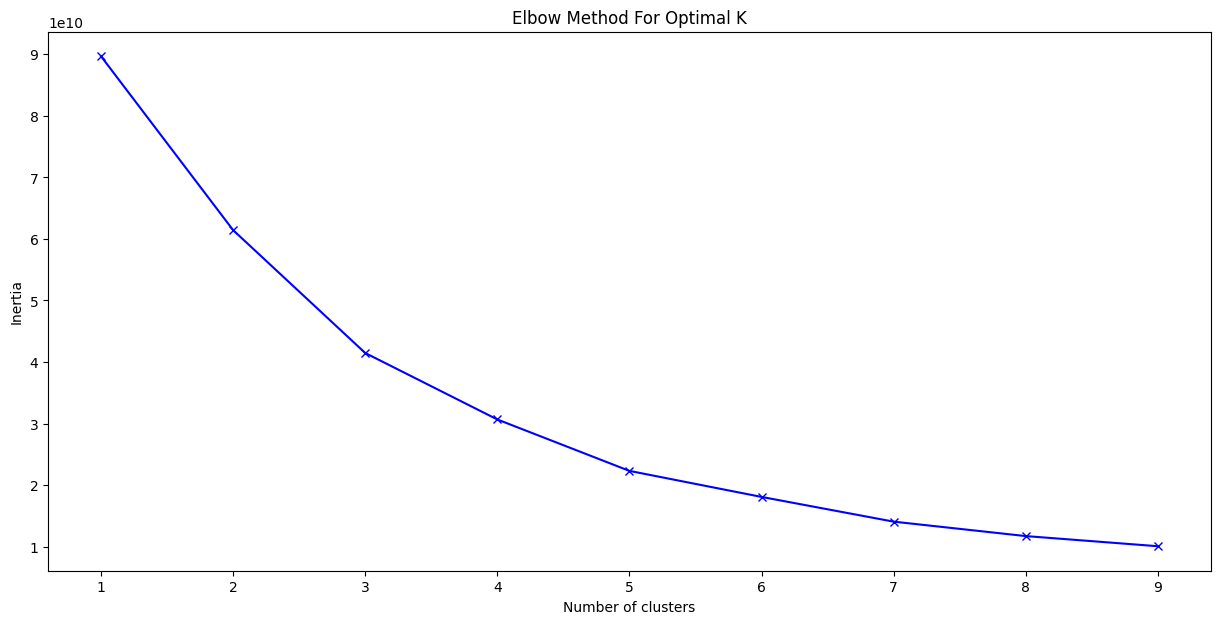

Initialization complete
Iteration 0, inertia 59619178253.26056.
Iteration 1, inertia 54300780516.24716.
Iteration 2, inertia 48814958848.76453.
Iteration 3, inertia 43813692268.39418.
Iteration 4, inertia 38806518173.44342.
Iteration 5, inertia 35207854240.41685.
Initialization complete
Iteration 0, inertia 78237298339.28114.
Iteration 1, inertia 68650962334.6178.
Iteration 2, inertia 62965395476.17269.
Iteration 3, inertia 57732959211.065056.
Iteration 4, inertia 53509186041.14653.
Iteration 5, inertia 50171195580.24089.
Initialization complete
Iteration 0, inertia 77411480674.93367.
Iteration 1, inertia 65006663207.698395.
Iteration 2, inertia 59661846118.54738.
Iteration 3, inertia 54933982883.93007.
Iteration 4, inertia 51104237361.774765.
Iteration 5, inertia 47029989010.018845.
Initialization complete
Iteration 0, inertia 82160885478.80087.
Iteration 1, inertia 70051428396.95212.
Iteration 2, inertia 60978273876.886765.
Iteration 3, inertia 54192170132.622665.
Iteration 4, inerti

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

cost = []
for num_clusters in range(1,10):
    print(num_clusters)
    kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++', max_iter= 6, verbose = 1)
    kmeans.fit(p_cc)
    cost.append(kmeans.inertia_)


plt.figure(figsize=(15,7))
plt.plot(range(1,10),cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


#creating clusters

kmeans = KMeans(n_clusters = 4 , init = 'random', max_iter= 6, verbose = 1)
clusters = kmeans.fit_predict(p_cc)



kmeans2 = KMeans(n_clusters = 3 , init = 'random', max_iter= 6, verbose = 1)
clusters2 = kmeans2.fit_predict(p_cc)


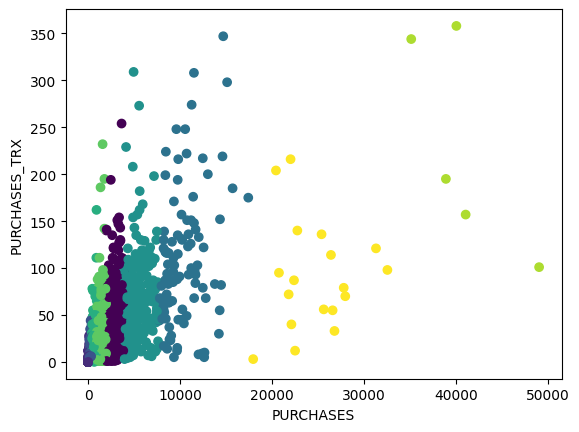

In [ ]:
plt.scatter(credit['PURCHASES'], credit['PURCHASES_TRX'], c = clusters, cmap= 'viridis')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_TRX')
plt.show()




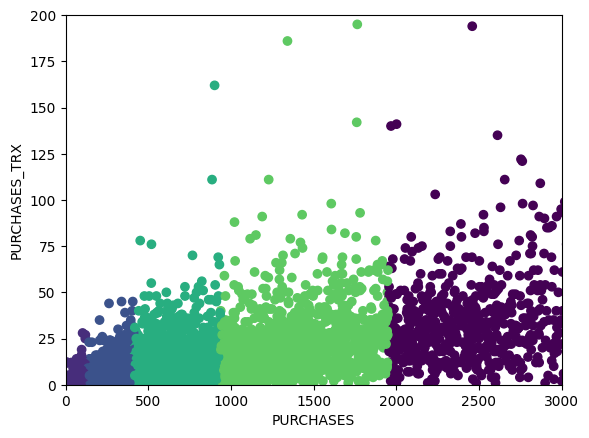

In [ ]:
plt.scatter(credit['PURCHASES'], credit['PURCHASES_TRX'], c = clusters, cmap= 'viridis')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_TRX')
plt.xlim(0, 3000)  # Adjust the values based on your data
plt.ylim(0, 200)    # Adjust the values based on your data
plt.show()

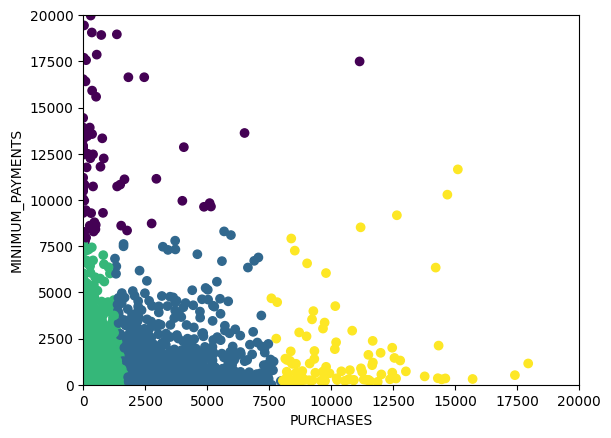

In [ ]:
 plt.scatter(credit['PURCHASES'], credit['MINIMUM_PAYMENTS'], c = clusters, cmap= 'viridis', )
plt.xlabel('PURCHASES')
plt.ylabel('MINIMUM_PAYMENTS')
plt.xlim(0, 20000)  # Adjust the values based on your data
plt.ylim(0, 20000)
plt.show()




In [ ]:
center_colors = [col_map[l] for l in range(num_clusters)]
plt.scatter(centers2D[:,0], centers2D[:,1],  marker='x', s=200, linewidths=2, c=center_colors)

In [ ]:
kmeans.cluster_centers_
purple
blue
green
yellow

array([[ 1207.27698413, 14901.78736402],
       [ 2931.77776882,   813.42086762],
       [  366.20964271,   569.36246517],
       [12796.74881119,  1963.16248254]])

In [ ]:
kmeans.cluster_centers_

array([[ 1207.27698413, 14901.78736402],
       [ 2931.77776882,   813.42086762],
       [  366.20964271,   569.36246517],
       [12796.74881119,  1963.16248254]])

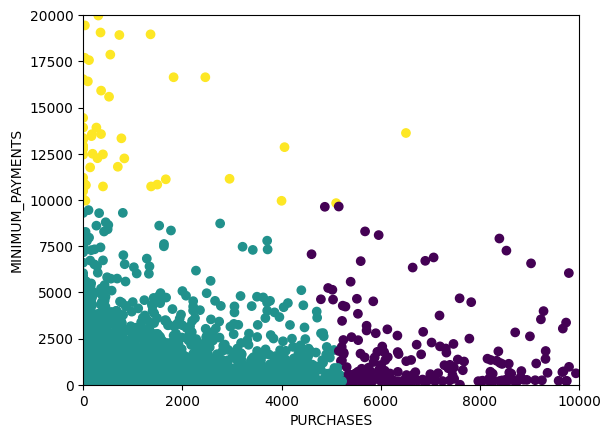

In [ ]:
 plt.scatter(credit['PURCHASES'], credit['MINIMUM_PAYMENTS'], c = clusters2, cmap= 'viridis', )
plt.xlabel('PURCHASES')
plt.ylabel('MINIMUM_PAYMENTS')
plt.xlim(0, 10000)  # Adjust the values based on your data
plt.ylim(0, 20000)
plt.show()

